In [90]:
import numpy as np
import numpy.random as npr
import scipy.stats as stats

def q(x):
  return stats.norm.sf(x)

import matplotlib.pyplot as plt
%matplotlib inline

# Conditioning with Random Variables

It is commonly said that "all probabilities are conditional". That is true for random variables, too.  Random variables can depend on events or on other random variables. Let's start with the simplest case. We are given a random variable for which the distribution of the random variable depends on some other event. This will be most clear through an example:

**Motivating Example: Binary Communications**

In a binary communication system, a transmitter attempts to communicate a stream of bits to a receiver. The received signal is a noisy version of the transmitted signal. After some signal processing, the received signal is converted into a *decision statistic*, $X$, which is a random variable that can be used to decide whether the transmitted signal was a 0 or a 1. For the decision statistic to be useful in deciding which bit was transmitted, its distribution must change depending on which bit was transmitted. In many cases, $X$ is a Normal random variable, and the standard deviation of $X$ does not depend on which bit was transmitted. The mean will change depending on which bit was transmitted. Let's use the following model:

\begin{align*}
  \begin{cases}
  X  \sim \mbox{Normal}(+1,\sigma), & 0 \mbox{ transmitted}\\
  X  \sim \mbox{Normal}(-1,\sigma), & 1 \mbox{ transmitted}.
  \end{cases}
\end{align*}

Let $T_i$ denote the event that $i$ is transmitted.  Then can write a  conditional distribution function for $X$ given that $i$ was transmitted as

$$
F_X(x|T_i) = P(X \le x | T_i).
$$

We can then easily extend this to a conditional pdf, which is defined as the derivative of the conditional cdf,

$$
f_X(x|T_i) = \frac{d}{dx} F_X(x|T_i).
$$


An example of the conditional densities for this binary communication system example is shown below:

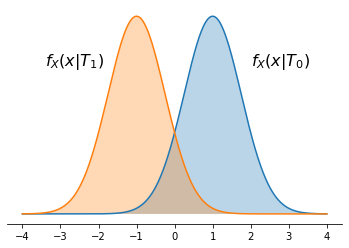

In [33]:
sigma=0.75
p0=1/2
G0=stats.norm(loc=1,scale=sigma)
G1=stats.norm(loc=-1,scale=sigma)
x=np.linspace(-4,4,1001)
p1=1-p0

# plot the weighted densities:
# these are proportional to the APPs
plt.plot(x,p0*G0.pdf(x))
plt.plot(x,p1*G1.pdf(x))

# Fill under the regions found above
plt.fill_between(x,p0*G0.pdf(x),alpha=0.3)
plt.fill_between(x,p1*G1.pdf(x),alpha=0.3)

ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([]);

plt.annotate('$f_X(x|T_0)$', (2,0.2), fontsize=16)
plt.annotate('$f_X(x|T_1)$', (-3.4,0.2), fontsize=16);

Now let's see how we can use conditional densities and distributions:

**Part a)** Calculate the probability that $X>2$ if $P(T_0)=0.25$ and $P(T_1)=0.75$ if $\sigma=2$

Now that we have the concept of conditional distributions, we have the tools to solve this type of problem. The first thing to realize is that the problem is that we do not know the distribution of $X$: **we only know conditional distributions of $X$ given $T_i$**. We can consider $T_i$ to be the hidden state in this problem.  To find $P(X>2)$, we can apply the Law of Total Probability, where we condition on the hidden state:

$$
P(X>2) = P(X>2|T_0)P(T_0) + P(X>2|T_1)P(T_1).
$$

We are given $P(T_0)$ and $P(T_1)$ in the problem statement, and we know that conditioned on a particular $T_i$, $X$ is Normal with some mean $\mu \in \{+1, -1\}$ and standard deviation $\sigma = 2$. Here are two different approaches to solve this problem using the conditional distributions:

1. We can uses SciPy.stats to create each of the conditional distributions and then use the built in methods to evaluate the probability. Start by creating the two conditional distributions:



In [35]:
XgivenT0 = stats.norm(1, 2)
XgivenT1 = stats.norm(-1, 2)

Then $P(X>2|T_i)$ is simply the survival function of $X$ using the conditional distribution given $T_i$. So, $P(X>2|T_0)$ can be evaluated as

In [36]:
XgivenT0.sf(2)

0.3085375387259869

Similarly, we can evaluate $P(X>2|T_1)$ as

In [37]:
XgivenT1.sf(2)

0.06680720126885807

Putting these values into the Total Probability expression gives the value for $P(X>2)$,

In [38]:
XgivenT0.sf(2) * 0.25 + XgivenT1.sf(2) * 0.75

0.12723978563314026

2. Suppose that we wanted to give an expression for $P(X>2)$ in terms of the $Q()$ function instead. We could rewrite the forms $P(X>2|T_0)$ in terms of conditional distribution functions, like $P(X>2|T_0) = 1 - P(X \le 2 |T_0) = 1- F_X(2|T_0)$.  It is more efficient to just realize that each conditional distribution is Normal, and thus we can directly apply our distance-based approaches to find the probabilities in terms of the $Q()$ function. Note that 2 is greater than either value of $\mu$, so we are evaluating the probabilities of two right tails, as shown in the plots below:

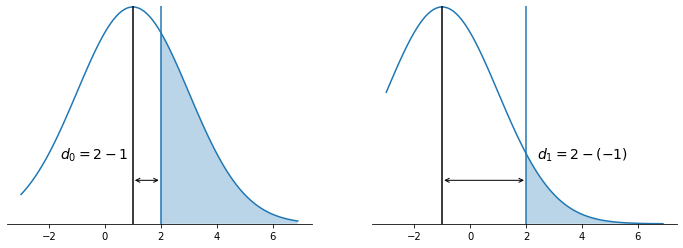

In [88]:
sigma=2
p0=1/2
means = [1, -1]
G0=stats.norm(loc=1,scale=sigma)
G1=stats.norm(loc=-1,scale=sigma)
x=np.arange(-3,7,0.1)
greater2 = np.arange(2, 7, 0.1)
p1=1-p0

fig, axs = plt.subplots(1,2, figsize=(12,4))
# plot the weighted densities:
# these are proportional to the APPs
axs[0].plot(x,p0*G0.pdf(x))
axs[1].plot(x,p1*G1.pdf(x))

# Fill under the regions found above
axs[0].fill_between(greater2,p0*G0.pdf(greater2),alpha=0.3)
axs[1].fill_between(greater2,p1*G1.pdf(greater2),alpha=0.3)

for i, ax in enumerate(axs):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.get_yaxis().set_ticks([]);
  ax.axvline(2)
  ax.axvline(means[i], color='black')
  ax.annotate('', xy=(means[i],0.02), xytext=(2, 0.02), xycoords='data',             
              arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"), )
  
  ax.set_ylim(0, 0.1)

axs[0].annotate('$d_0 = 2 - 1$', xy=(means[i],0.02), xytext=(-1.6, 0.03), xycoords='data', fontsize=14)
axs[1].annotate('$d_1 = 2 - (-1)$', xy=(means[i],0.02), xytext=(2.4, 0.03), xycoords='data', fontsize=14)



  
plt.annotate('$f_X(x|T_0)$', (2,0.2), fontsize=16)
plt.annotate('$f_X(x|T_1)$', (-3.4,0.2), fontsize=16);


The probability $P(X>2)$ is 

\begin{align}
P(X>2) &= Q\left(\frac{d_0}{\sigma} \right)(0.25) +
Q\left(\frac{d_1}{\sigma} \right)(0.75) \\
&=Q\left(\frac{1}{2} \right)(0.25) +
Q\left(\frac{3}{2} \right)(0.75) 
\end{align}


We can use our usual `q()` function to evaluate this probability:

In [91]:
q(1/2)*0.25+q(3/2)*0.75

0.12723978563314026

This result matches our previous answer.

**JMS: WORKING HERE**

**Part b)** Calculate the probability of error if the decision rule is:

$$
\begin{cases}
\hat{T}_0, & X \ge 0\\
\hat{T}_1, & X<0,
\end{cases}
$$
where $\hat{T}_i$ denotes deciding that $i$ was transmitted. Provide a numerical answer for $\sigma^2=0.1$

\begin{align}
P(E) &= P(X\ge 0 \cap T_1) + P(X<0 \cap T_0) \\
&= P(X \ge 0 \vert T_1)P(T_1) + P(X<0 \vert T_0) P(T_0)\\
\end{align}

\begin{align}
&= Q\left(\frac{1-0}{\sigma}\right) P(T_1) + Q(\left(\frac{1-0}{\sigma} \right) P(T_0) \\
&= Q\left(\frac{1}{\sigma}\right)\\
&=
\end{align}

In [18]:
stats.norm.sf(1/np.sqrt(0.1))

0.000782701129001274

## Optimal Decisions

Now suppose that we want to make an optimal decision $\hat{T}_i$ based on the observing the value of $X$ at the output of the receiver. I.e., given that we have $X=x$ for some value $x$

The MAP rule is to choose the most probable value that was transmitted given the observation. So, that corresponds to:

* If $P(T_0 \vert X=x) \ge P(T_1 \vert X=x)$, decide 0
* If $P(T_1 \vert X=x) > P(T_0 \vert X=x)$, decide 1

and by the definition of conditional probability

$$
P(T_0|X=x) = \frac{P(T_0 \cap X=x)}{P(X=x)}
$$

But both the numerator and denominator are 0, because $X$ is a continuous random variable!

## Point Conditioning

Suppose we want to evaluate the probability of an event $A$ given
that $\!X=\!x$, where $X$ is a continuous random variable.  

* Then, if we use the definition of conditional probability
\begin{align*}
P(A|X = x) &=  \frac{P(A \cap X\!=\!x)}{P(X\!=\!x)}  = \frac{0}{0}       ,
\end{align*}



This case is called *point conditioning*, and we treat it as a special case:


\begin{eqnarray*}
P(A|X = x) \! \! &=& \underset{ \Delta x \rightarrow 0}{\lim} P(A| 
 x < X \le x+ \Delta x  )   \\
\!\!&=& \underset{ \Delta x \rightarrow 0}{\lim}
\frac{F_X(x + \Delta x |A)- F_X(x|A)}{F_X(x+\Delta x)-F_X(x)} 
P(A) 
\end{eqnarray*}






\begin{eqnarray*}
&=& \underset{ \Delta x \rightarrow 0}{\lim}
\frac{\frac{ F_X(x + \Delta x |A)- F_X(x|A)}{ \Delta x}}
{ \frac {F_X(x+\Delta x)-F_X(x)}{ \Delta x}} P(A) \\
&=& \frac{f_X(x|A)}{f_X(x)} P(A),
\end{eqnarray*}
if $f_X(x|A)$ and $f_X(x)$ exist, and $f_X(x) \ne 0$.

(The result looks like what you would do if you didn't know any better -- treat the densities as if they were probabilities, and everything works out!)




## Implications of Point Conditioning

Note that the form above is almost a Bayes' rule form: If $A$ is some input event and $f_X(x|A)$ is the likelihood of $X$ given $A$, then $P(A|X=x)$ is the *a posteriori* probability of $A$ given that the output of the system is $X=x$

However, we don't know how to calculate $f_X(x)$ yet


If  $\left\{A_i\right\}$ form a partition of $S$, then from our previous work on the Law of Total Probability, we have
\begin{align}
F_X(x) &= P(X \le x) \\
&= \sum_i P(X \le x| A_i) P(A_i) \\
&= \sum_i F_X(x|A_i) P(A_i)
\end{align}
    
Since $ f_X(x) = \frac{d}{dx} F_X(x)$ and $f_X(x|A_i) = \frac{d}{dx} F_X(x|A_i)$,
\begin{align}
f_X(x) &= \frac{d}{dx} F_X(x) \\
&= \frac{d}{dx}\sum_i F_X(x|A_i) P(A_i) \\
&= \sum_i \left[\frac{d}{dx} F_X(x|A_i) \right]P(A_i)  \\
&= \sum_i f_X(x|A_i) P(A_i) 
\end{align}
   
   **(Total Probability for Conditional Density Functions)**


* Note that 

 \begin{align*}
   &P(A|X = x) = \frac{f_X(x|A)}{f_X(x)} P(A) \\
   \mbox{ } \\
   \Rightarrow& P(A|X=x)f_X(x) = f_X(x|A)P(A) \\
   \mbox{ } \\
   \Rightarrow& \int_{-\infty}^{\infty} P(A|X=x)f_X(x) dx 
   =  \int_{-\infty}^{\infty} f_X(x|A) dx P(A) \\
 \Rightarrow& P(A) =\int_{-\infty}^{\infty} P(A|X=x)f_X(x) dx 
 \end{align*}
**(Continuous Version of Law of Total Probability)** 

 




**Point Conditioning Form of Baye's Rule:**

  If $\{A_i, ~i=0,1,\ldots, n-1\}$ form a partition of $S$, then
\begin{eqnarray*}
   P(A_i|X \!=\! x)  &~=~& \frac{f_X(x|A_i) P(A_i)}{
      \sum_{i=0}^{n-1}{f_X(x|A_i) P(A_i)}
      }
\end{eqnarray*}



**Example 3** Find the MAP decision rules for the binary communication system

The MAP rule is to choose $\hat{T}_0$ if $T_0$ maximizes
\begin{align}
P(T_0 \vert X=x) & \ge P(T_1 \vert X=x) \\
\frac{f_X(x=x|T_0)P(T_0)}{f_X(x)} & \ge \frac{f_X(x=x|T_1)P(T_1)}{f_X(x)} \\
f_X(x=x|T_0)P(T_0) & \ge f_X(x=x|T_1)P(T_1)
\end{align}

and choose $\hat{T}_1$ otherwise

We could simplify this further by substituting in the conditional densities but plotting the weighted densities and the decision regions will give us much more insight:

In [19]:
def drawMAP(p0,sigma2=1):
    ''' Draw the weighted densities for the binary communication system problem
    and shade under them according to the MAP decision rule. 
    
    Inputs:
    p0= probability that 0 is transmitted 
    sigma2= variance of the Gaussian noise (default is 1)'''
    
    # Set up random varaibles 
    G0=stats.norm(loc=1,scale=np.sqrt(sigma2))
    G1=stats.norm(loc=-1,scale=np.sqrt(sigma2))
    x=np.linspace(-4,4,1001)
    p1=1-p0
        
    # plot the weighted densities:
    # these are proportional to the APPs
    plt.plot(x,p0*G0.pdf(x))
    plt.plot(x,p1*G1.pdf(x))
    
    # Determine the regions where the APP for 0 is 
    # bigger and the APP for 1 is bigger
    R0=x[np.where(p0*G0.pdf(x)>= p1*G1.pdf(x))]
    R1=x[np.where(p0*G0.pdf(x)< p1*G1.pdf(x))]

    # Fill under the regions found above
    plt.fill_between(R0,p0*G0.pdf(R0),alpha=0.3)
    plt.fill_between(R1,p1*G1.pdf(R1),alpha=0.3)
    
    # Print the MAP threshold
    print("MAP decision threshold is",round(R0[0],2))

MAP decision threshold is 0.0


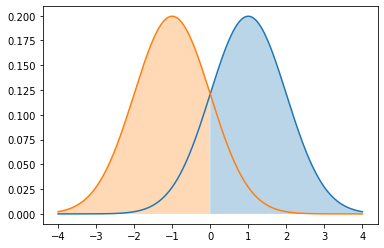

In [20]:
drawMAP(0.5)

MAP decision threshold is 0.55


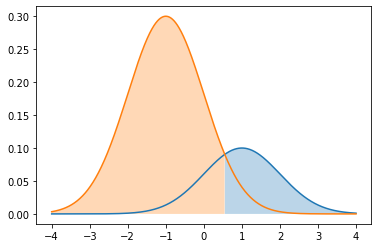

In [21]:
drawMAP(0.25)

MAP decision threshold is -0.54


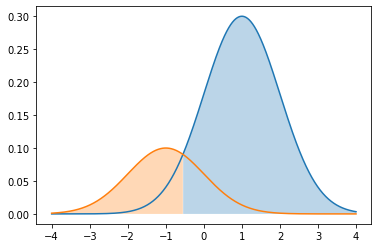

In [22]:
drawMAP(0.75)

MAP decision threshold is -1.1


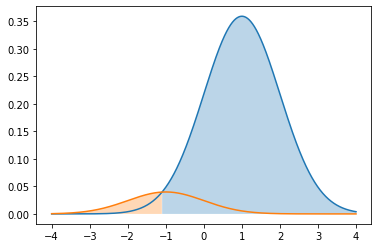

In [23]:
drawMAP(0.9)

MAP decision threshold is -1.47


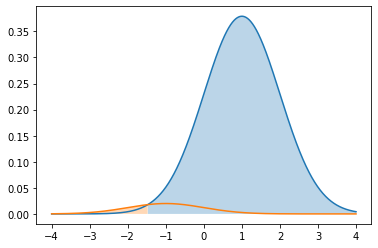

In [24]:
drawMAP(0.95)